In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

from tqdm import tqdm

In [2]:
#EDA
col_1 = ['unit', 'time', 'op1', 'op2', 'op3']
col_2 = [f'sr{i+1}' for i in range(21)]
columns = col_1 + col_2

# Load datasets and assign column names
df = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD001.txt', delim_whitespace=True, header=None, names=columns)
test = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\test_FD001.txt', delim_whitespace=True, header=None, names=columns)

# Add features to training data
df['max_time'] = df.groupby('unit')['time'].transform('max')
df['remaining_time'] = df['max_time'] - df['time']
df['label'] = df['remaining_time'].clip(upper=130)

# Preview data
df.head()

C:\Users\65962\AppData\Local\Temp\ipykernel_1804\1115416755.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD001.txt', delim_whitespace=True, header=None, names=columns)
C:\Users\65962\AppData\Local\Temp\ipykernel_1804\1115416755.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\test_FD001.txt', delim_whitespace=True, header=None, names=columns)


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191,130
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190,130
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189,130
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188,130
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187,130


In [3]:
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

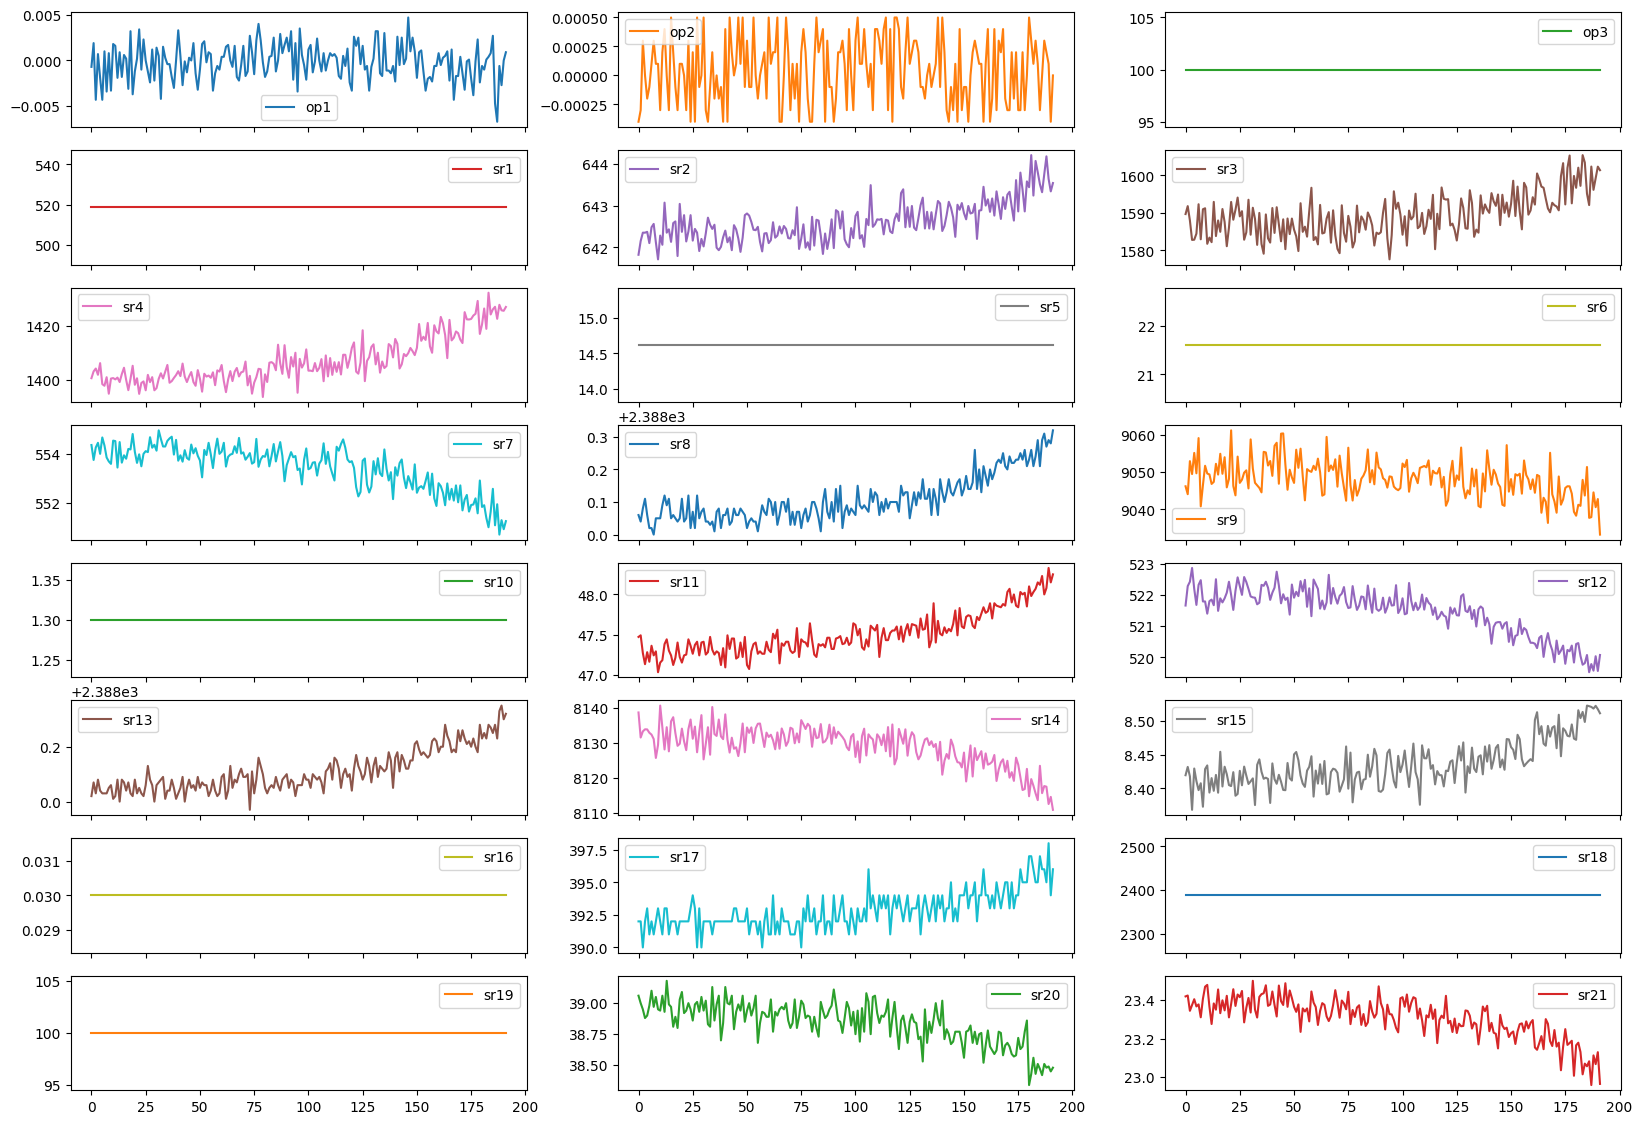

In [4]:
#split the data into 2: also removing OP settings; keep all sensors (removing OP settings enable extraction to be faster)
df_1=df[df['unit']==1].iloc[:,2:]
df_1[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

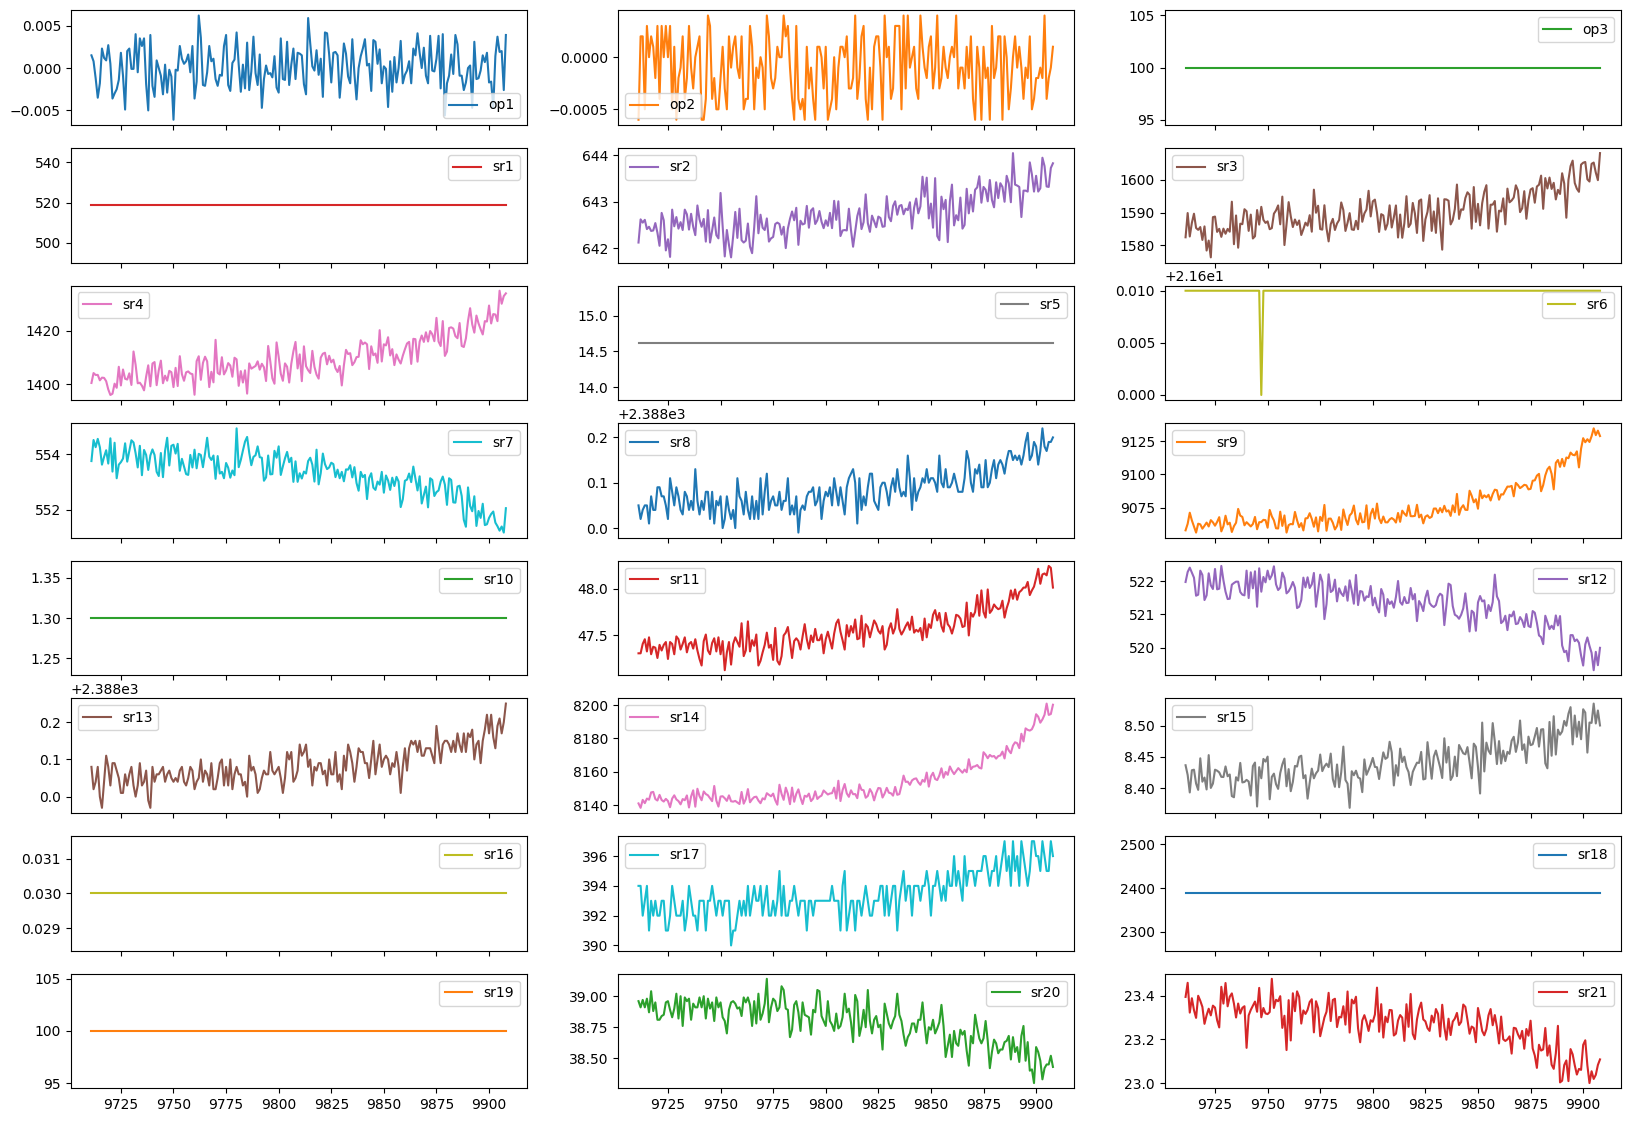

In [5]:
df_20=df[df['unit']==50].iloc[:,2:]
df_20[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

In [6]:
# Data processing with tsfresh
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import EfficientFCParameters

In [7]:
#Rolling time series data
window_size = 30

rolling_params = {
    "column_id": "unit",
    "column_sort": "time",
    "max_timeshift": window_size - 1,
    "min_timeshift": window_size-1,
    "rolling_direction": 1
}

rolled_df = roll_time_series(df, **rolling_params)

rolled_test = roll_time_series(test, **rolling_params)

Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 38/38 [00:03<00:00, 11.99it/s]


In [8]:
#select and extract features (uses all sensors)
selected_cols=['id', 'sr1','sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']
selected_df=rolled_df[selected_cols]
selected_test=rolled_test[selected_cols]

def split_and_extract_features(df, selected_cols, n_parts=10, feature_params=None):
    # Select relevant columns
    selected_df = df[selected_cols]
    
    # Get unique ids and divide them into n parts
    unique_ids = selected_df['id'].unique()
    split_size = len(unique_ids) // n_parts
    
    # Initialize a list to store extracted feature DataFrames
    feature_dfs = []
    
    # Split unique ids into n parts and extract features for each part
    for i in range(n_parts):
        # Determine start and end indices for the current part
        start_idx = i * split_size
        end_idx = (i + 1) * split_size if i < n_parts - 1 else len(unique_ids)
        
        # Filter the DataFrame for the current part based on the unique ids
        part_ids = unique_ids[start_idx:end_idx]
        part_df = selected_df[selected_df['id'].isin(part_ids)]
        
        # Apply feature extraction to the current part
        extracted_features = extract_features(part_df, **feature_params)
        
        # Append the extracted features to the list
        feature_dfs.append(extracted_features)
    
    # Concatenate all extracted feature DataFrames into one
    combined_features = pd.concat(feature_dfs, axis=0)
    return combined_features

# Parameters for feature extraction
extraction_settings = EfficientFCParameters()
feature_params = {"column_id": "id",
                  "impute_function": impute,
                  "default_fc_parameters": extraction_settings}

# Apply the split and feature extraction function to the training data
X = split_and_extract_features(rolled_df, selected_cols, n_parts=10, feature_params=feature_params)

# Apply feature extraction to the test set 
x_test = split_and_extract_features(selected_test, selected_cols, n_parts=10, feature_params=feature_params)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 40/40 [03:09<00:00,  4.74s/it]


In [9]:
y=rolled_df.groupby('id')['label'].last()
X_filtered=select_features(X, y)
print(X_filtered.shape)
X_filtered.head()

(17731, 4525)


sr8__minimum  \
1 30        2388.0   
  31        2388.0   
  32        2388.0   
  33        2388.0   
  34        2388.0   

      sr7__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)  \
1 30                                        1662.857063              
  31                                        1662.812491              
  32                                        1662.770849              
  33                                        1662.663238              
  34                                        1662.621070              

      sr7__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)  \
1 30                                        2091.286297             
  31                                        2091.226709             
  32                                        2091.258750             
  33                                        2091.216210             
  34                                        2091.193420             

      sr7__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)  \
1 30                                        1653.456325             
  31                                        1653.416389             
  32                                        1653.382205             
  33                                        1653.331878             
  34                                        1653.221031             

      sr7__cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20)  \
1 30                                         417.984811            
  31                                         417.946683            
  32                                         417.833197            
  33                                         417.851802            
  34                                         417.914514            

      sr7__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)  \
1 30                                        2010.890955             
  31                                        2010.800494             
  32                                        2010.829471             
  33                                        2010.787467             
  34                                        2010.717341             

      sr7__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)  \
1 30                                        1624.043931             
  31                                        1624.056287             
  32                                        1624.048702             
  33                                        1623.987471             
  34                                        1623.927067             

      sr12__mean_n_absolute_max__number_of_maxima_7  \
1 30                                     522.542857   
  31                                     522.542857   
  32                                     522.542857   
  33                                     522.541429   
  34                                     522.464286   

      sr12__fft_coefficient__attr_"real"__coeff_0  sr13__root_mean_square  \
1 30                                     15661.86             2388.046667   
  31                                     15662.15             2388.048000   
  32                                     15661.79             2388.048000   
  33                                     15661.28             2388.049667   
  34                                     15660.12             2388.050000   

      ...  sr7__lempel_ziv_complexity__bins_2  sr15__fourier_entropy__bins_10  \
1 30  ...                            0.400000                        1.630433   
  31  ...                            0.366667                        1.667462   
  32  ...                            0.400000                        1.717076   
  33  ...                            0.400000                        1.721402   
  34  ...                            0.400000                        1.661323   

      sr12__permutation_entropy__dimension_6__tau_1  \
1 30                                       3.21

In [10]:
#scale data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

selected_features = relevant_features_scaled_df.columns 
relevant_test_features = x_test[selected_features]
relevant_test_features_scaled = scaler.transform(relevant_test_features)
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

In [11]:
print(selected_features)

Index(['sr8__minimum',
       'sr7__cwt_coefficients__coeff_10__w_10__widths_(2, 5, 10, 20)',
       'sr7__cwt_coefficients__coeff_9__w_20__widths_(2, 5, 10, 20)',
       'sr7__cwt_coefficients__coeff_9__w_10__widths_(2, 5, 10, 20)',
       'sr7__cwt_coefficients__coeff_9__w_5__widths_(2, 5, 10, 20)',
       'sr7__cwt_coefficients__coeff_8__w_20__widths_(2, 5, 10, 20)',
       'sr7__cwt_coefficients__coeff_8__w_10__widths_(2, 5, 10, 20)',
       'sr12__mean_n_absolute_max__number_of_maxima_7',
       'sr12__fft_coefficient__attr_"real"__coeff_0', 'sr13__root_mean_square',
       ...
       'sr7__lempel_ziv_complexity__bins_2', 'sr15__fourier_entropy__bins_10',
       'sr12__permutation_entropy__dimension_6__tau_1',
       'sr11__sum_of_reoccurring_values',
       'sr8__permutation_entropy__dimension_7__tau_1',
       'sr13__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.2',
       'sr3__fft_coefficient__attr_"abs"__coeff_3',
       'sr8__change_quantiles__f_agg_"mean"__isabs_T

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [16]:
rul_file_path = r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\RUL_FD001.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
y_test = true_rul['RUL']

In [17]:
def calculate_s_score(y_true, y_pred):
    # Calculate the error between predictions and actual values
    error = y_pred - y_true
    
    # Apply S-score calculation
    s_score = np.where(
        error <= 0, 
        np.exp(-error / 13) - 1, 
        np.exp(error / 10) - 1
    )
    
    # Return the mean S-score
    return np.mean(s_score)


def evaluate_model(model, X_train, y_train, X_val, y_val, X_test=None, Y_test=None):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics for validation
    s_score = calculate_s_score(y_val, y_pred)
    mse_val = mean_squared_error(y_val, y_pred)
    rmse_val = mse_val ** 0.5
    
    # Print validation results
    model_name = model.__class__.__name__
    print(f'{model_name} model - Validation Set')
    print('RMSE:', rmse_val)
    print('S-score:', s_score)
    print('---------------------')
    
    results = {'model': model_name, 'rmse_val': rmse_val, 's_score': s_score}
    
    # If test set provided, predict and evaluate on test set
    if X_test is not None and Y_test is not None:
        y_pred_test = model.predict(X_test)
        temp = rolled_test.groupby('id').last()
        temp['prediction'] = y_pred_test
        Y_pred = temp.groupby('unit')['prediction'].last().to_numpy()
        
        # Calculate RMSE for test set
        s_test = calculate_s_score(Y_test, Y_pred)
        mse_test = mean_squared_error(Y_test, Y_pred)
        rmse_test = mse_test ** 0.5
        print(f'{model_name} model - Test Set')
        print('Test RMSE:', rmse_test)
        print('Test score:', s_test)
        print('---------------------')
        
        # Store test results in the results dictionary
        results.update({'rmse_test': rmse_test, 'test_score': s_test})
    
    return results

In [18]:
#USING DEEP LEARNING MODEL WITH PYTORCH
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.base import BaseEstimator, RegressorMixin

def scheduler(epoch, optimizer):
    if epoch < 5:
        lr = 0.001
    else:
        lr = 0.0001
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


class ConvLSTMModel(nn.Module):
    def __init__(self, input_channels, drop_CNN=0.1, drop_dense=0.1, kernel_size=3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=128, kernel_size=kernel_size, padding=kernel_size//2)
        self.dropout1 = nn.Dropout(p=drop_CNN)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2, padding=1)

        self.conv2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=kernel_size, padding=kernel_size//2)
        self.dropout2 = nn.Dropout(p=drop_CNN)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2, padding=1)

        self.lstm1 = nn.LSTM(input_size=128, hidden_size=128, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=128, num_layers=1, batch_first=True)

        self.dropout3 = nn.Dropout(p=drop_dense)
        self.dense1 = nn.Linear(128, 512)
        self.dense2 = nn.Linear(512, 128)
        self.dense3 = nn.Linear(128, 1)

    def forward(self, x):
        # x shape: (batch_size, window_length, input_channels)
        x = x.permute(0, 2, 1)  # Convert to (batch_size, input_channels, window_length)
        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.dropout2(x)
        x = self.pool2(x)

        x = x.permute(0, 2, 1)  # Convert to (batch_size, seq_length, channels)

        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = x[:, -1, :]

        # Dropout layer
        x = self.dropout3(x)

        x = F.relu(self.dense1(x))
        x = F.relu(self.dense2(x))
        x = self.dense3(x)
        
        return x


class ConvLSTMRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_channels=1, lr=0.001, batch_size=64, max_epoch=500, drop_CNN=0.1, drop_dense=0.1, kernel_size=3):
        self.lr = lr
        self.batch_size = batch_size
        self.max_epoch = max_epoch
        self.model = ConvLSTMModel(input_channels=input_channels, drop_CNN=drop_CNN, drop_dense=drop_dense, kernel_size=kernel_size)

    def _prepare_input(self, X):
        """
        Detect input data dimensions:
        If the input is two-dimensional data (samples, features), a pseudo-time dimension is added (samples, 1, features).
        If the input is three-dimensional data (samples, seq_length, channels), it is returned directly.
        """
        if X.ndim == 2:
            X = np.expand_dims(X, axis=1) 
        return X

        
    def fit(self, X, y):
        # Detect and adjust input data dimensions
        X = self._prepare_input(X)

        # Convert X, y to torch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        # Define optimizer
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.MSELoss()

        # Training loop
        self.model.train()
        for epoch in range(self.max_epoch):
            running_loss = 0.0
            permutation = torch.randperm(X_tensor.size(0))
            for i in range(0, X_tensor.size(0), self.batch_size):
                indices = permutation[i:i + self.batch_size]
                batch_x, batch_y = X_tensor[indices], y_tensor[indices]

                optimizer.zero_grad()
                outputs = self.model(batch_x)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            if (epoch + 1) % 1 == 0:
                print(f"Epoch {epoch + 1}/{self.max_epoch}, Loss: {running_loss/X_tensor.size(0):.4f}")

            # adjust learning rate based on epoch
            scheduler(epoch, optimizer)

        return self

    def predict(self, X):
        # Detect and adjust input data dimensions
        X = self._prepare_input(X)

        # Convert X to torch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)
        
        # Prediction
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(X_tensor).numpy()
        
        return predictions.flatten()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500),
          ConvLSTMRegressor(input_channels=X_train.shape[-1], batch_size=64, lr=0.001, max_epoch=10)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison

results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 8.479585925774176
S-score: 1.2245371959382707
---------------------
XGBRegressor model - Test Set
Test RMSE: 14.054511117607772
Test score: 3.005779738645099
---------------------
RandomForestRegressor model - Validation Set
RMSE: 8.688446961824432
S-score: 1.2934973077010927
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 14.289069753321085
Test score: 3.157526943353308
---------------------
MLPRegressor model - Validation Set
RMSE: 3.6470373273959527
S-score: 0.3038736855391154
---------------------
MLPRegressor model - Test Set
Test RMSE: 15.428123674340629
Test score: 4.115102787043794
---------------------


C:\Users\65962\AppData\Local\Temp\ipykernel_1804\3752264545.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


Epoch 1/10, Loss: 21.6368
Epoch 2/10, Loss: 1.2011
Epoch 3/10, Loss: 0.6682
Epoch 4/10, Loss: 0.4640
Epoch 5/10, Loss: 0.3930
Epoch 6/10, Loss: 0.3249
Epoch 7/10, Loss: 0.2683
Epoch 8/10, Loss: 0.2407
Epoch 9/10, Loss: 0.2351
Epoch 10/10, Loss: 0.2299
ConvLSTMRegressor model - Validation Set
RMSE: 3.276972165554107
S-score: 0.25581677944274644
---------------------
ConvLSTMRegressor model - Test Set
Test RMSE: 17.419948037696383
Test score: 11.65616993129336
---------------------
                   model  rmse_val   s_score  rmse_test  test_score
0           XGBRegressor  8.479586  1.224537  14.054511    3.005780
1  RandomForestRegressor  8.688447  1.293497  14.289070    3.157527
2           MLPRegressor  3.647037  0.303874  15.428124    4.115103
3      ConvLSTMRegressor  3.276972  0.255817  17.419948   11.656170


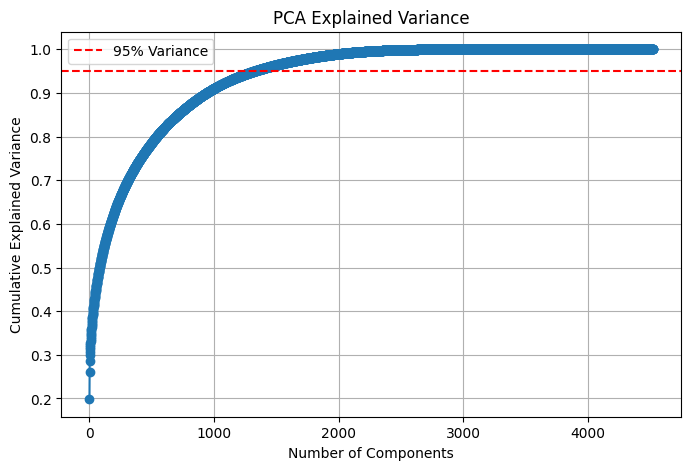

Optimal number of components for 95% variance: 1327


In [20]:
from sklearn.decomposition import PCA
#Initialising and fitting PCA (Principal Component Analysis)
pca = PCA()  # Adjust based on your dataset
pca.fit(X_train)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components to retain at least 95% variance
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components for 95% variance:", optimal_n_components)

In [21]:
pca = PCA(n_components=1302)  # Adjust based on your dataset
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(relevant_test_features_scaled_df)

In [22]:
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500),
          ConvLSTMRegressor(input_channels=X_train.shape[-1], batch_size=64, lr=0.001, max_epoch=10)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 8.479585925774176
S-score: 1.2245371959382707
---------------------
XGBRegressor model - Test Set
Test RMSE: 14.054511117607772
Test score: 3.005779738645099
---------------------
RandomForestRegressor model - Validation Set
RMSE: 8.68470120121116
S-score: 1.252962300737986
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 15.001394522734877
Test score: 3.5817900972115613
---------------------
MLPRegressor model - Validation Set
RMSE: 4.45726507478197
S-score: 0.37516812310776865
---------------------
MLPRegressor model - Test Set
Test RMSE: 15.130725942479886
Test score: 4.798613191639538
---------------------


C:\Users\65962\AppData\Local\Temp\ipykernel_1804\3752264545.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


Epoch 1/10, Loss: 22.6826
Epoch 2/10, Loss: 1.1352
Epoch 3/10, Loss: 0.6029
Epoch 4/10, Loss: 0.4556
Epoch 5/10, Loss: 0.3828
Epoch 6/10, Loss: 0.3308
Epoch 7/10, Loss: 0.2629
Epoch 8/10, Loss: 0.2429
Epoch 9/10, Loss: 0.2297
Epoch 10/10, Loss: 0.2256
ConvLSTMRegressor model - Validation Set
RMSE: 3.1667905244402177
S-score: 0.24249567641429257
---------------------
ConvLSTMRegressor model - Test Set
Test RMSE: 16.670598170442926
Test score: 8.247457668089801
---------------------
                   model  rmse_val   s_score  rmse_test  test_score
0           XGBRegressor  8.479586  1.224537  14.054511    3.005780
1  RandomForestRegressor  8.684701  1.252962  15.001395    3.581790
2           MLPRegressor  4.457265  0.375168  15.130726    4.798613
3      ConvLSTMRegressor  3.166791  0.242496  16.670598    8.247458
